INTRODUCTION

This dataset contains 7,999 water samples with 21 attributes representing various chemical and biological properties. It includes levels of contaminants such as aluminium, lead, bacteria, and nitrates, along with an "is_safe" column indicating whether the water is safe (1) or unsafe (0) for consumption. The dataset can be used to analyze water quality and build predictive models.

IMPORT LABRIES AND LOAD DATASET 

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


df=pd.read_csv(r"C:\Data Science\data_set\waterQuality1.csv")
print(df)





      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05

DATA CLEANING 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [3]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop(columns=["arsenic","cadmium","chromium","copper","mercury","silver","selenium","uranium","lead","perchlorate"],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aluminium   7999 non-null   float64
 1   ammonia     7999 non-null   object 
 2   barium      7999 non-null   float64
 3   chloramine  7999 non-null   float64
 4   flouride    7999 non-null   float64
 5   bacteria    7999 non-null   float64
 6   viruses     7999 non-null   float64
 7   nitrates    7999 non-null   float64
 8   nitrites    7999 non-null   float64
 9   radium      7999 non-null   float64
 10  is_safe     7999 non-null   object 
dtypes: float64(9), object(2)
memory usage: 687.5+ KB


In [7]:
le=LabelEncoder()
colum=['ammonia','is_safe']
for col in colum:
    df[col]=le.fit_transform(df[col])
df.head(10)


,aluminium,ammonia,barium,chloramine,flouride,bacteria,viruses,nitrates,nitrites,radium,is_safe
0,1.65,2476,2.85,0.35,0.05,0.20,0.000,16.08,1.13,6.78,2
1,2.32,1222,3.31,5.28,0.90,0.65,0.650,2.01,1.93,3.21,2
2,1.01,526,0.58,4.24,0.99,0.05,0.003,14.16,1.11,7.07,1
3,1.36,307,2.96,7.23,1.08,0.71,0.710,1.41,1.29,1.72,2
4,0.92,1511,0.20,2.67,0.61,0.13,0.001,6.74,1.11,2.41,2
5,0.94,563,2.88,0.80,0.11,0.67,0.670,9.75,1.89,5.42,2
6,2.36,2181,1.35,1.28,0.33,0.13,0.007,18.60,1.78,2.84,1
7,3.93,1019,0.66,6.22,0.86,0.16,0.005,13.65,1.81,7.24,1
8,0.60,1531,0.71,3.14,0.98,0.35,0.002,14.66,1.84,4.99,2
9,0.22,746,1.37,6.40,1.24,0.83,0.830,4.79,1.46,0.08,2


DATA VISUALIZATION BY FINDING CORRELATION BETWEEN THE DATAS

            aluminium   ammonia    barium  chloramine  flouride  bacteria  \
aluminium    1.000000  0.023380  0.294145    0.369309 -0.009784 -0.078238   
ammonia      0.023380  1.000000  0.006938    0.033920 -0.010709  0.016497   
barium       0.294145  0.006938  1.000000    0.446928 -0.018548  0.101259   
chloramine   0.369309  0.033920  0.446928    1.000000  0.004400  0.154510   
flouride    -0.009784 -0.010709 -0.018548    0.004400  1.000000  0.014134   
bacteria    -0.078238  0.016497  0.101259    0.154510  0.014134  1.000000   
viruses     -0.070863 -0.000447 -0.002276    0.003687  0.018418  0.618480   
nitrates    -0.003810 -0.044998 -0.011331   -0.001551 -0.008140 -0.033920   
nitrites     0.237307 -0.015331  0.312711    0.379685 -0.016669  0.246252   
radium       0.243217  0.009692  0.286569    0.388806  0.007688  0.099298   
is_safe      0.333848  0.018831  0.091255    0.187286  0.007182 -0.021507   

             viruses  nitrates  nitrites    radium   is_safe  
aluminium  -

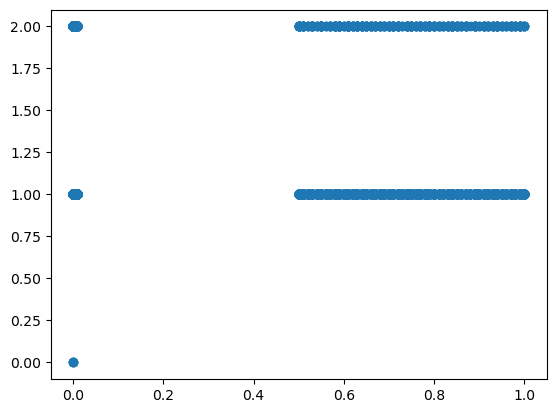

In [8]:
cor=df[['aluminium','ammonia','barium','chloramine','flouride','bacteria','viruses','nitrates','nitrites','radium','is_safe']].corr()
print(cor)
#sns.heatmap(cor,annot=True)
plt.scatter(df['viruses'],df['is_safe'])
plt.show()

EXTRACTING INDEPENDENT AND DEPENDENT VARIABLES

In [9]:
x=df[['aluminium','ammonia','barium','chloramine','flouride','bacteria','viruses','nitrates','nitrites','radium']].values
x=pd.DataFrame(x)
y=df['is_safe'].values
y=pd.DataFrame(y)

SPLITING DATA INTO TRAIN AND TEST DATA 

In [10]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=56)

FIND TYPE 

In [11]:
print(type(x_train),type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


MODEL BUILDING AND EVALUATE PREDICTIONS

In [12]:
model=LogisticRegression(multi_class='multinomial',random_state=0)
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [13]:
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

[1 1 1 ... 1 1 1]
      0
5208  1
2056  1
1334  1
6342  1
6868  1
...  ..
914   2
6069  1
3826  1
6097  1
4977  1

[2000 rows x 1 columns]


In [14]:
print("mean squared error of logistic regression:",metrics.mean_squared_error(y_pred,y_test))
print("accuracy of logistic regression:",metrics.accuracy_score(y_pred,y_test)*100)

mean squared error of logistic regression: 0.1195
accuracy of logistic regression: 88.05


MODEL XGB CLASSFIER AND EVALUATE PREDICTIONS

In [15]:
model1=XGBClassifier()
model1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [16]:
y_pred=model1.predict(x_test)
print(y_pred)
print(y_test)

[1 1 1 ... 1 1 1]
      0
5208  1
2056  1
1334  1
6342  1
6868  1
...  ..
914   2
6069  1
3826  1
6097  1
4977  1

[2000 rows x 1 columns]


In [17]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy*100,"%")

accuracy: 89.1 %


SUMMARY

This project aimed to predict whether the water is safe (1) or unsafe (0) for consumption.after processing,we tested logistic regression..The logistic regression achieved the highest accuracy of 88.05%,and while using XGB classifier model we achieved the accuracy of 89.1%,it increses while using boosting techinqe....